In [28]:
import pandas as pd
import numpy as np
df=pd.read_csv('iris.data')
df

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [30]:
headers = ['sepal length', 'sepal width', 'petal length','petal width','class']
df.columns = headers
df

,sepal length,sepal width,petal length,petal width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [31]:
df['class'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: class, dtype: int64

In [33]:
from sklearn.svm import LinearSVC

# Train a Linear SVM model
clf = LinearSVC(max_iter=1000)
clf.fit(X_train, y_train)

# Check the accuracy on the training data
accuracy = clf.score(X_train, y_train)
print(f"Linear SVM Accuracy: {accuracy}")

# If accuracy is high and the model converges quickly, the dataset is likely linearly separable
if accuracy > 0.9:  # Adjust the threshold as needed
    print("The dataset is likely linearly separable.")
else:
    print("The dataset is likely not linearly separable.")

Linear SVM Accuracy: 0.9747899159663865
The dataset is likely linearly separable.


c:\Users\admin\New\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\admin\New\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['class_encoded'] = le.fit_transform(df['class'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


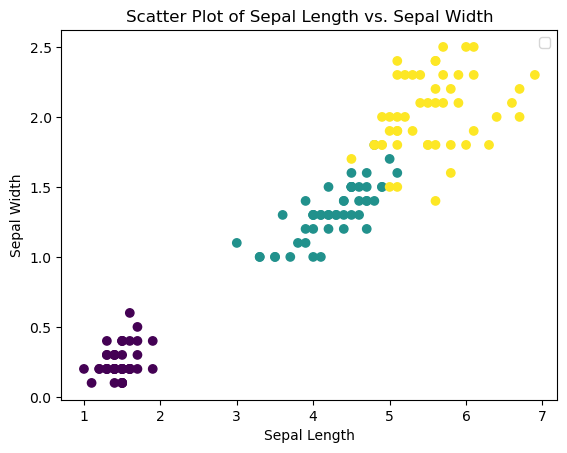

In [44]:
plt.scatter(df['petal length'],df['petal width'], c=df['class_encoded'])
plt.title('Scatter Plot of Sepal Length vs. Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder

In [46]:
X = df[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y = df['class_encoded']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
lda = LinearDiscriminantAnalysis(n_components=2)  # Reduce to 2 dimensions
X_lda = lda.fit_transform(X_train, y_train)

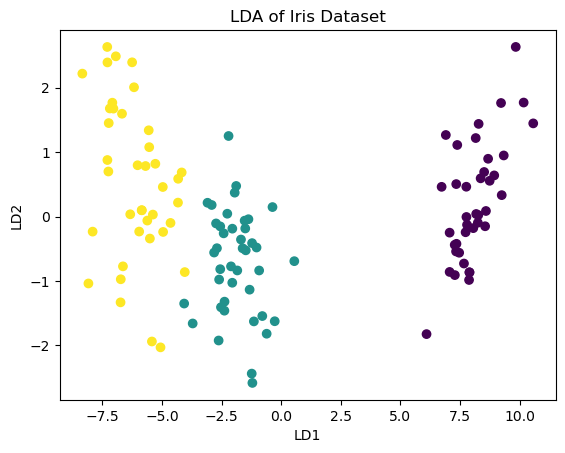

In [48]:
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y_train, cmap='viridis')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA of Iris Dataset')
plt.show()

In [49]:
y_pred = lda.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9333333333333333
